# Machine Learning Overview

* supervised learning ( 지도학습 )  - trained using **labeled examples** , desired output is known! 
* 추천하는 책: Introduction to Statistical Learning by Gareth James

What is machine learning?  
* method of data analytis that automates model building 
* find hidden insights from data 

supervised machine learning process
1. Data acquisition
2. Data cleaning 
3. Testing data 
4. Model training building 
5. Model testing 
6. Model Deployment

Text Classification and recognition is a very common and widely applicable use of ML 

label (y: predict) <-features (x)

70% - training data
30 % - test data

# Classification Metrics

how we evaluate our model ? with classification metrics

key classification metrics 
1. accuracy
    * number of correct predictions / total number of predictions (ex. 0.8) 
    * useful when target classes are well balanced 
    * But not a good choice with unbalanced classes! 

2. recall
    * ability of a model to find all the **relevant cases** within a dataset
    * number of true positives / number of true positives + number of false negatives
3. precision
    * identify only the relevant data points 
    * expresses the proportion of the data points our model says was relevant actually were relavant 
    * number of true positives / number of true positives + number of false positives
4. f1-score
    * harmonic mean of precision and recall
    * f1= (2 * precision * recall )/ precision + recall 
    

binary classification ? only 2 available classes 
ex. spam vs ham(legitimiate message)


raw text message ( x_test ) -> vectorizer -> Vectorized text message ( x_test )

Vectorized text message ( x_test )-> trained model -> prediction on test message 

compare correct label from y_test ===  prediction on test message 


테스트데이터로 트레이닝된 모델로 예측한 값과 테스트데이터의 y label을 비교
여기서 얼마나 맞췄는지? 

# Confusion Metrics

In [ ]:
True condition
Predicted condition - what your ml predicted 

* condition positive - prediction positive : TRUE POSITIVE
* condition negative - prediction positive : FALSE POSITIVE ( type 1 error )
* condition positive - prediction negative : False Negative ( type 2 error )
* condition negative - prediction positive : True Negative  


# Scikit-Learn Primer : Code Along part 1 

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('./UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv',sep='\t')

In [7]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [9]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [10]:
len(df)

5572

In [12]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [13]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### length and punction 으로 스팸문자 가려보기 

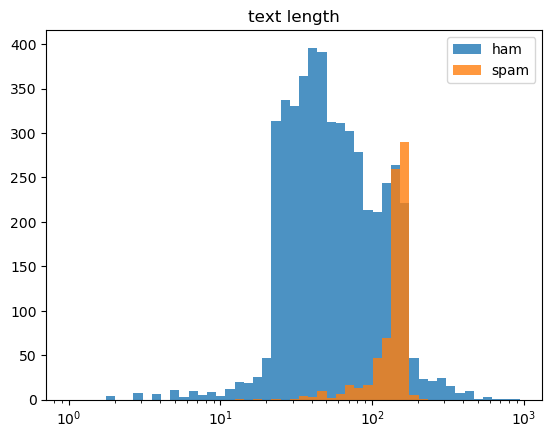

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.title('text length')
plt.show()

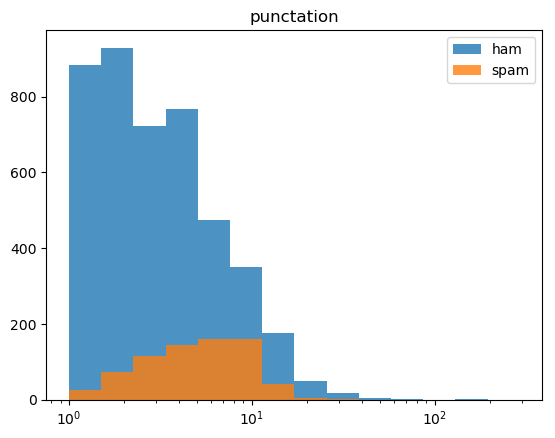

In [17]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.title('punctation')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [29]:
X = df[['length','punct']]
y = df['label']


x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42) 

In [30]:
x_train.shape

(3900, 2)

In [31]:
x_test.shape

(1672, 2)

In [32]:
y_test.shape

(1672,)

In [33]:
y_train.shape

(3900,)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr_model = LogisticRegression(solver='lbfgs')

In [36]:
lr_model.fit(x_train, y_train)

/Users/heewonnie/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
from sklearn import metrics

In [38]:
predictions = lr_model.predict(x_test)

In [39]:
print(metrics.confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [40]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [41]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [42]:
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [44]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
predictions = nb_model.predict(x_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [47]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [48]:
print(metrics.accuracy_score(y_test,predictions))

0.8600478468899522


In [51]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
predictions = svc_model.predict(x_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1373   75]
 [ 121  103]]


In [53]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

   micro avg       0.88      0.88      0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [54]:
print(metrics.accuracy_score(y_test,predictions))

0.8827751196172249


# Text Feature Extraction 

* perform extraction from raw text in order to pass numerical features to the machine learning algorithm 


#### count vectorization
raw text  -> use CountVectorizer from sklearn.feature_extraction.text

document 별로 안에 있는 단어들이 feature 가 되고 , 각 document 에 있는 해당 단어의 횟수로 Document Term Matrix 제작 (DTM ) 


#### TfidfVectorizer 
DTM을 토큰 횟수로 채우는 것이 아니라 term-frequency-inverse document frequency value for each word (TF- IDF) 로 채움 

* Term Frequency ( TF) : raw count of a term in a document. # of term in a document 



* inverse document frequency (IDF) : inverse fraction of the documents that contain the word : LOG( total number of docs / number of docs containing the term) 


TF-IDF: term frequency * (1/ document frequency)


# Text Feature Extraction : Code Along 

* basic manual implementation of building a vocab
* using scikit-learn for vectorization
* using pipelines with scikit-learn

In [56]:
%%writefile 1.txt
This is a story about cats
our feline pets
Cats are furry animals

Writing 1.txt


In [57]:
%%writefile 2.txt
This story is about surfing
Catching waves is fun
Surfing is a popular water sport

Writing 2.txt


In [58]:
vocab = {}
i = 1

with open('1.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}


In [59]:
with open('2.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12, 'surfing': 13, 'catching': 14, 'waves': 15, 'fun': 16, 'popular': 17, 'water': 18, 'sport': 19}


### feature extraction

In [66]:
one = ['1.txt']+[0]*len(vocab)
one

['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [67]:
with open('1.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    print(word)
    one[vocab[word]]+=1
    

this
is
a
story
about
cats
our
feline
pets
cats
are
furry
animals


In [68]:
one

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [69]:
two = ['2.txt']+[0]*len(vocab)

with open('2.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    two[vocab[word]]+=1

In [70]:
# Compare the two vectors:
print(f'{one}\n{two}')

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
['2.txt', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1]


## Feature Extraction from Text

In [71]:
df = pd.read_csv('./UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv', sep="\t")

In [72]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [73]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#### Split the data into train & test sets:

In [74]:
from sklearn.model_selection import train_test_split

X = df['message']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Scikit-learn's CountVectorizer
Text preprocessing, tokenizing and the ability to filter out stopwords are all included in [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), which builds a dictionary of features and transforms documents to feature vectors.

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

# Text Classification Code Along 